## AI Programming with Python Nanodegree: Image Classifier Project
  - Do not make changes to the first 2 code cells, they are being used for setting up the `flowers` dataset and `cat_to_name.json`. Start writing code from third code cell onwards.
  - To use this notebook: `File > Save a copy in Drive`
  

### Code Explanation:

- **Setting Up Flower Dataset:**
  - `data_dir = './flowers'`: Defines the directory path for the flower dataset.
  - `FLOWERS_DIR = Path(data_dir)`: Uses `Path` from `pathlib` for handling PosixPath.

- **Downloading and Extracting Dataset:**
  - `if not FLOWERS_DIR.is_dir()`: Checks if the dataset directory exists.
    - `FLOWERS_DIR.mkdir(parents=True, exist_ok=True)`: Creates the directory if not present.
  - `TARBALL = FLOWERS_DIR / "flower_data.tar.gz"`: Defines the tarball path.
  - Downloads and extracts the dataset if not already present:
    - `request = requests.get(...)`: Downloads the 'flower_data.tar.gz' file.
    - `with open(TARBALL, "wb") as file_ref`: Writes the downloaded content to the tarball.
    - `with tarfile.open(TARBALL, "r") as tar_ref`: Extracts the tarball contents to the dataset directory.

- **Cleaning Up:**
  - `os.remove(TARBALL)`: Deletes the downloaded tarball to save space.

- **Status Messages:**
  - Prints informative messages about the directory creation, download, extraction, and cleanup.


In [ ]:
# imports
import os
import requests
from pathlib import Path
import tarfile
import collections

# defining dataset directory
data_dir = './flowers'

# using pathlib.Path for handling PosixPath
FLOWERS_DIR = Path(data_dir)

# downloading and setting up data if not already present
if not FLOWERS_DIR.is_dir():
    # creating directory
    FLOWERS_DIR.mkdir(parents=True, exist_ok=True)
    print(f"[INFO] Directory created: ./{FLOWERS_DIR}")

    print() # for readability

    # tarball path
    TARBALL = FLOWERS_DIR / "flower_data.tar.gz"

    # downloading and writing the tarball to './flowers' directory
    print(f"[INFO] Downloading the file 'flower_data.tar.gz' to ./{FLOWERS_DIR}")
    request = requests.get('https://s3.amazonaws.com/content.udacity-data.com/nd089/flower_data.tar.gz')
    with open(TARBALL, "wb") as file_ref:
        file_ref.write(request.content)
        print(f"[INFO] 'flower_data.tar.gz' saved to ./{FLOWERS_DIR}")

    print() # for readability

    # extracting the downloaded tarball
    print(f"[INFO] Extracting the downloaded tarball to ./{FLOWERS_DIR}")
    with tarfile.open(TARBALL, "r") as tar_ref:
        tar_ref.extractall(FLOWERS_DIR)
        print(f"[INFO] 'flower_data.tar.gz' extracted successfully to ./{FLOWERS_DIR}")

    print() # for readability

    # using os.remove to delete the downloaded tarball
    print("[INFO] Deleting the tarball to save space.")
    os.remove(TARBALL)
else:
    print(f"[INFO] Dataset already setup at ./{FLOWERS_DIR}")

[INFO] Directory created: ./flowers

[INFO] Downloading the file 'flower_data.tar.gz' to ./flowers
[INFO] 'flower_data.tar.gz' saved to ./flowers

[INFO] Extracting the downloaded tarball to ./flowers
[INFO] 'flower_data.tar.gz' extracted successfully to ./flowers

[INFO] Deleting the tarball to save space.


### Code Explanation:

- **Creating a JSON File for Flower Categories:**
  - `data`: Defines a dictionary containing numerical keys and corresponding flower names.
  - `with open('cat_to_name.json', 'w') as file`: Opens the file 'cat_to_name.json' for writing.
  - `json.dump(data, file)`: Writes the dictionary data to the JSON file.

- **Interpreting the Output:**
  - The code creates a JSON file named 'cat_to_name.json' that serves as a mapping between numerical keys and flower names. This mapping can be useful for associating numerical labels with human-readable names in machine learning tasks.


In [ ]:
import json

data = {
    "21": "fire lily", "3": "canterbury bells", "45": "bolero deep blue", "1": "pink primrose", "34": "mexican aster",
    "27": "prince of wales feathers", "7": "moon orchid", "16": "globe-flower", "25": "grape hyacinth", "26": "corn poppy",
    "79": "toad lily", "39": "siam tulip", "24": "red ginger", "67": "spring crocus", "35": "alpine sea holly",
    "32": "garden phlox", "10": "globe thistle", "6": "tiger lily", "93": "ball moss", "33": "love in the mist",
    "9": "monkshood", "102": "blackberry lily", "14": "spear thistle", "19": "balloon flower", "100": "blanket flower",
    "13": "king protea", "49": "oxeye daisy", "15": "yellow iris", "61": "cautleya spicata", "31": "carnation",
    "64": "silverbush", "68": "bearded iris", "63": "black-eyed susan", "69": "windflower", "62": "japanese anemone",
    "20": "giant white arum lily", "38": "great masterwort", "4": "sweet pea", "86": "tree mallow",
    "101": "trumpet creeper", "42": "daffodil", "22": "pincushion flower", "2": "hard-leaved pocket orchid",
    "54": "sunflower", "66": "osteospermum", "70": "tree poppy", "85": "desert-rose", "99": "bromelia", "87": "magnolia",
    "5": "english marigold", "92": "bee balm", "28": "stemless gentian", "97": "mallow", "57": "gaura",
    "40": "lenten rose", "47": "marigold", "59": "orange dahlia", "48": "buttercup", "55": "pelargonium",
    "36": "ruby-lipped cattleya", "91": "hippeastrum", "29": "artichoke", "71": "gazania", "90": "canna lily",
    "18": "peruvian lily", "98": "mexican petunia", "8": "bird of paradise", "30": "sweet william",
    "17": "purple coneflower", "52": "wild pansy", "84": "columbine", "12": "colt's foot", "11": "snapdragon",
    "96": "camellia", "23": "fritillary", "50": "common dandelion", "44": "poinsettia", "53": "primula",
    "72": "azalea", "65": "californian poppy", "80": "anthurium", "76": "morning glory", "37": "cape flower",
    "56": "bishop of llandaff", "60": "pink-yellow dahlia", "82": "clematis", "58": "geranium", "75": "thorn apple",
    "41": "barbeton daisy", "95": "bougainvillea", "43": "sword lily", "83": "hibiscus", "78": "lotus lotus",
    "88": "cyclamen", "94": "foxglove", "81": "frangipani", "74": "rose", "89": "watercress", "73": "water lily",
    "46": "wallflower", "77": "passion flower", "51": "petunia"
}

with open('cat_to_name.json', 'w') as file:
    json.dump(data, file)

In [ ]:
# Imports here
%matplotlib inline
import torch
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models

from PIL import Image

In [ ]:
print(torch.__version__)
print(torch.cuda.is_available())

2.1.0+cu121
True


In [ ]:
data_dir = 'flowers'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'
test_dir = data_dir + '/test'

In [ ]:
# Define transforms for the training, validation, and testing sets
train_transform = transforms.Compose([transforms.Resize(255),
                                      transforms.RandomRotation(50),
                                      transforms.RandomResizedCrop(224),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])])

valid_transform = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])])

test_transform = transforms.Compose([transforms.Resize(255),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])])

# Load the datasets with ImageFolder
train_data = datasets.ImageFolder(train_dir, transform = train_transform)
valid_data = datasets.ImageFolder(valid_dir, transform = valid_transform)
test_data = datasets.ImageFolder(test_dir, transform = test_transform)

# Using the image datasets and the trainforms, define the dataloaders
trainloader = torch.utils.data.DataLoader(train_data, batch_size = 64, shuffle = True)
validloader = torch.utils.data.DataLoader(valid_data, batch_size = 64)
testloader = torch.utils.data.DataLoader(test_data, batch_size = 64)

In [ ]:
with open('cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)

In [ ]:
# Use the VGG16 architecture as recommend above
model = models.vgg16(pretrained = True)
print(model)
# Freezing the network parameters
for param in model.parameters():
    param.requires_grad = False

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:04<00:00, 131MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
# Building the neural network
from collections import OrderedDict
classifier = nn.Sequential(OrderedDict([('fc1', nn.Linear(25088, 4096)),
                                        ('dropout', nn.Dropout(0.2)),
                                        ('relu', nn.ReLU()),
                                        ('fc2', nn.Linear(4096, 1024)),
                                        ('dropout', nn.Dropout(p=0.2)),
                                        ('relu', nn.ReLU()),
                                        ('fc3', nn.Linear(1024, 256)),
                                        ('dropout', nn.Dropout(p=0.2)),
                                        ('relu', nn.ReLU()),
                                        ('out', nn.Linear(256, 102)),
                                        ('softmax', nn.LogSoftmax(dim = 1))]))
model.classifier = classifier

In [ ]:
# Moving model to cuda gpu
device = "cpu"
if(torch.cuda.is_available()):
    device = "cuda"

model.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
# Defining the loss and optimizer criterion
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr = 0.001)

# Training the network
epochs = 7
steps = 0

train_losses, valid_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()

        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    else:
        valid_loss = 0
        accuracy = 0

        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            for images, labels in validloader:
                images, labels = images.to(device), labels.to(device)
                log_ps = model(images)
                valid_loss += criterion(log_ps, labels)

                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))

        train_losses.append(running_loss/len(trainloader))
        valid_losses.append(valid_loss/len(validloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Validation Loss: {:.3f}.. ".format(valid_loss/len(validloader)),
              "Validation Accuracy: {:.3f}".format(accuracy/len(validloader)))

print("Finished training network.")

Epoch: 1/7..  Training Loss: 2.712..  Validation Loss: 1.424..  Validation Accuracy: 0.613
Epoch: 2/7..  Training Loss: 1.751..  Validation Loss: 1.224..  Validation Accuracy: 0.688
Epoch: 3/7..  Training Loss: 1.548..  Validation Loss: 1.049..  Validation Accuracy: 0.718
Epoch: 4/7..  Training Loss: 1.409..  Validation Loss: 1.130..  Validation Accuracy: 0.739
Epoch: 5/7..  Training Loss: 1.373..  Validation Loss: 0.945..  Validation Accuracy: 0.766
Epoch: 6/7..  Training Loss: 1.340..  Validation Loss: 1.076..  Validation Accuracy: 0.749
Epoch: 7/7..  Training Loss: 1.305..  Validation Loss: 1.022..  Validation Accuracy: 0.760
Finished training network.


tensor([1.4243, 1.2240, 1.0488, 1.1303, 0.9452, 1.0763, 1.0219])


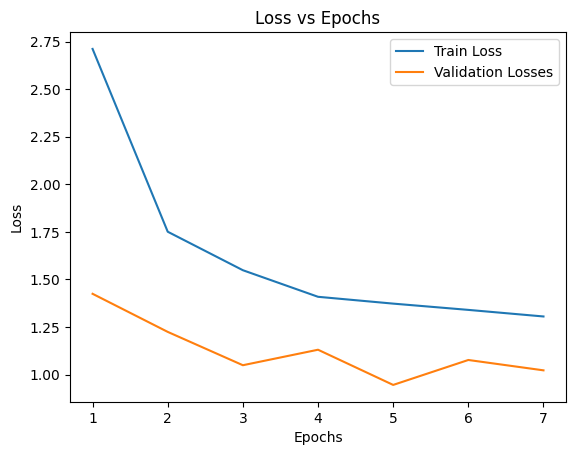

In [ ]:
# Plotting the graph of training loss and validation loss vs the epochs
valid_l = torch.tensor(valid_losses, device = 'cpu')
print(valid_l)
e = np.arange(1,epochs+1,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.plot(e, train_losses, label = "Train Loss")
plt.plot(e, valid_l, label = "Validation Losses")
plt.legend()
plt.show()

In [ ]:
# Testing the network
test_loss = 0
accuracy = 0
model.eval()
with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        logps = model.forward(inputs)
        ps = torch.exp(logps)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
        test_loss += criterion(logps, labels)
print("Test loss: {:.3f} Test accuracy: {:.3f}".format(test_loss/len(testloader), accuracy/len(testloader)))

Test loss: 0.871 Test accuracy: 0.778


In [ ]:
# Saving the checkpoint
checkpoint = {
    'epochs': epochs,
    'learning_rate': 0.001,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'criterion_state_dict': criterion.state_dict(),
    'class_to_idx': train_data.class_to_idx
}

torch.save(checkpoint, 'checkpoint.pth')
print("Finished saving checkpoint")

Finished saving checkpoint


In [ ]:
# Create a function to load the checkpoint
def load_checkpoint(checkpoint_path):
  model = models.vgg16(pretrained = True)
  for param in model.parameters():
        param.requires_grad = False

  classifier = nn.Sequential(OrderedDict([('fc1', nn.Linear(25088, 4096)),
                                        ('dropout', nn.Dropout(0.2)),
                                        ('relu', nn.ReLU()),
                                        ('fc2', nn.Linear(4096, 1024)),
                                        ('dropout', nn.Dropout(p=0.2)),
                                        ('relu', nn.ReLU()),
                                        ('fc3', nn.Linear(1024, 256)),
                                        ('dropout', nn.Dropout(p=0.2)),
                                        ('relu', nn.ReLU()),
                                        ('out', nn.Linear(256, 102)),
                                        ('softmax', nn.LogSoftmax(dim = 1))]))
  model.classifier = classifier
  checkpoint = torch.load(checkpoint_path)
  model.load_state_dict(checkpoint['model_state_dict'])
  epochs = checkpoint['epochs']
  learning_rate = checkpoint['learning_rate']

  model.class_to_idx = checkpoint['class_to_idx']

  return model, epochs, learning_rate

In [ ]:
model, epochs, lr = load_checkpoint('checkpoint.pth')

In [ ]:
def process_image(image):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
        returns an Numpy array
    '''
    image_transform = transforms.Compose([transforms.Resize(255),
                                                 transforms.CenterCrop(224),
                                                 transforms.ToTensor(),
                                                 transforms.Normalize([0.485, 0.456, 0.406],
                                                                      [0.229, 0.224, 0.225])])

    return image_transform(Image.open(image))

In [ ]:
def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()

    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    image = image.numpy().transpose((1, 2, 0))

    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean

    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)

    ax.imshow(image)

    return ax

<Axes: >

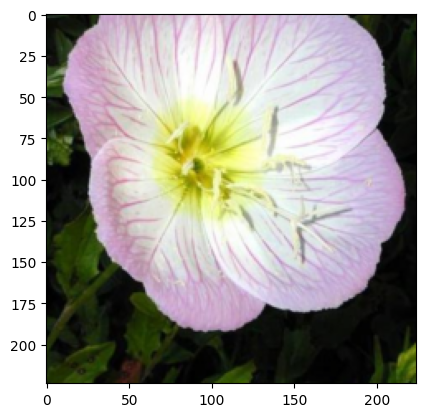

In [ ]:
imshow(process_image('flowers/test/1/image_06743.jpg'))

In [ ]:

def predict(image_path, model, topk=5):
    ''' Predict the class (or classes) of an image using a trained deep learning model.
    '''
    class_idx = model.class_to_idx
    model.eval()
    with torch.no_grad():
        logps = model.forward(process_image(image_path).unsqueeze(0))
        ps = torch.exp(logps)
        probs, top_class_index = ps.topk(topk, dim = 1)

        # Inverting the class_to_idx dictionary
        class_to_idx_inv = {class_idx[i]: i for i in class_idx}
        top_classes_index, top_classes = [], []

        with open('cat_to_name.json', 'r') as file:
          cat_to_name = json.load(file)
        for i in top_class_index.numpy()[0]:
          top_classes_index.append(class_to_idx_inv[i])
          top_classes.append(cat_to_name[class_to_idx_inv[i]])

        # Plotting the graph of the topk probabilites of flowers
        fig = plt.figure(figsize=(4, 4))
        prob = probs.numpy()[0]
        sns.barplot(y=top_classes, x=prob)
        plt.xlabel("Probability")
        plt.ylabel("Flowers")
        plt.show()
        return probs.numpy()[0], top_classes_index, top_classes


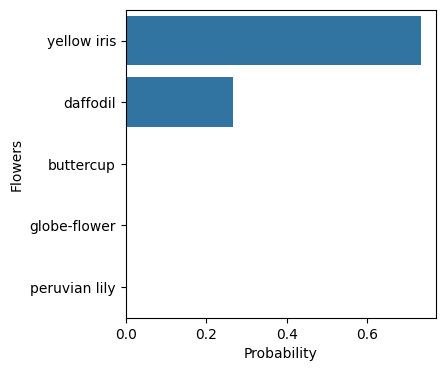

[7.3302853e-01 2.6692277e-01 2.6848695e-05 4.7113535e-06 3.0760009e-06]
['15', '42', '48', '16', '18']
['yellow iris', 'daffodil', 'buttercup', 'globe-flower', 'peruvian lily']


In [ ]:
probs, classes_idx, classes = predict('flowers/test/15/image_06369.jpg', model)
print(probs)
print(classes_idx)
print(classes)

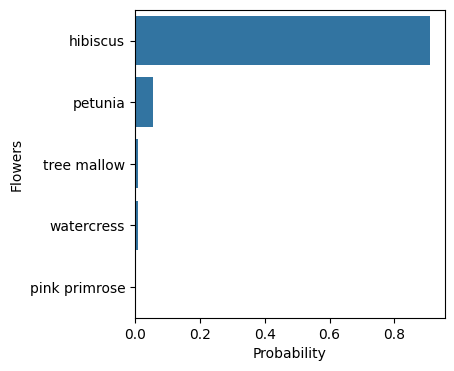

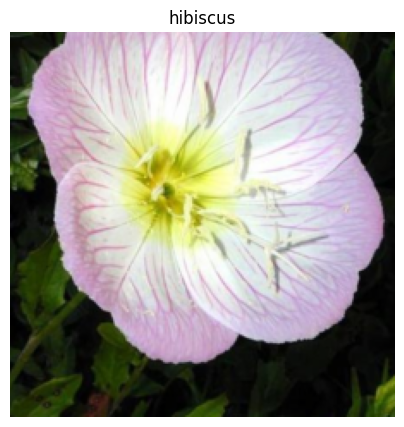

In [ ]:
# Plotting Image
predict_probs, class_idx, predict_classes = predict('/content/flowers/test/1/image_06743.jpg', model)
fig = plt.figure(figsize = (5,5))
ax = plt.subplot(1,1,1)
ax.set_title(predict_classes[0])
plt.axis('off')
imshow(process_image('/content/flowers/test/1/image_06743.jpg'), ax, title="lol");


In [ ]:
# Removing the .pth files
! rm *.pth

Loading and preprocessing data from /content/flowers ...
Finished loading and preprocessing data.

Building network ... architecture: vgg19, hidden_units: 4096


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:10<00:00, 52.4MB/s]


Finished building network.

Training network ... epochs: 10, learning_rate: 0.0002, device used for training: cuda
Epoch: 1/10..  Training Loss: 2.514..  Validation Loss: 1.041..  Validation Accuracy: 0.722
Epoch: 2/10..  Training Loss: 1.199..  Validation Loss: 0.679..  Validation Accuracy: 0.812
Epoch: 3/10..  Training Loss: 0.915..  Validation Loss: 0.554..  Validation Accuracy: 0.851
Epoch: 4/10..  Training Loss: 0.834..  Validation Loss: 0.549..  Validation Accuracy: 0.842
Epoch: 5/10..  Training Loss: 0.739..  Validation Loss: 0.563..  Validation Accuracy: 0.848
Epoch: 6/10..  Training Loss: 0.683..  Validation Loss: 0.493..  Validation Accuracy: 0.853
Epoch: 7/10..  Training Loss: 0.635..  Validation Loss: 0.525..  Validation Accuracy: 0.873
Epoch: 8/10..  Training Loss: 0.590..  Validation Loss: 0.457..  Validation Accuracy: 0.871
Epoch: 9/10..  Training Loss: 0.560..  Validation Loss: 0.461..  Validation Accuracy: 0.878
Epoch: 10/10..  Training Loss: 0.559..  Validation Loss: 

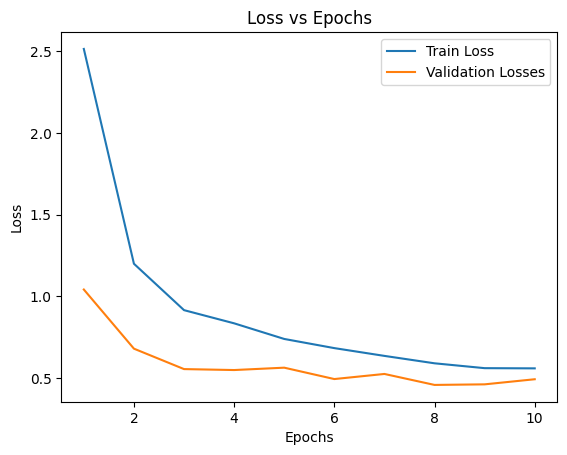

Testing network ... device used for testing: cuda
Finished evaluating the model with the test dataset
Test loss: 0.489, Test accuracy: 0.862
Saving model ... epochs: 10, learning_rate: 0.0002, save_dir: 
Successfully saved checkpoint to  directory

Finished training, testing and saving the checkpoint.

*** Run the predict.py to predict your image ***


<Figure size 640x480 with 0 Axes>

In [ ]:
%run train.py '/content/flowers' --arch='vgg19' --gpu='1' --epochs=10  --learning_rate=0.0002

In [ ]:
!python predict.py --gpu='1' '/content/flowers/test/101/image_07983.jpg' '/content/checkpoint.pth'


Loading and building model from /content/checkpoint.pth

Building network ... architecture: vgg19, hidden_units: 4096
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Finished building network.
VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
 


Loading and building model from /content/checkpoint.pth

Building network ... architecture: vgg19, hidden_units: 4096


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Finished building network.
VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=

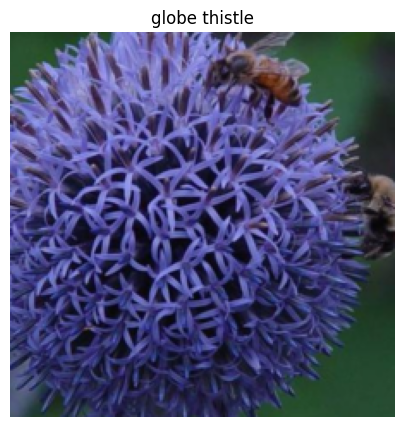

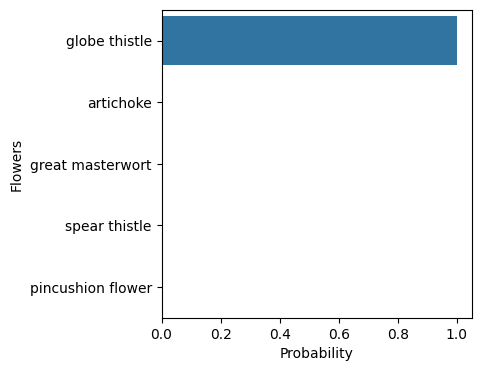

Prediction results :
[9.9972242e-01 2.6795734e-04 8.7929138e-06 3.4334664e-07 2.7525684e-07]
['10', '29', '38', '14', '22']
['globe thistle', 'artichoke', 'great masterwort', 'spear thistle', 'pincushion flower']


In [10]:
%run predict.py --gpu='0' '/content/flowers/test/10/image_07090.jpg' '/content/checkpoint.pth'